In [1]:
!pip install -U -q datasets==2.15.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
gcsfs 2023.12.2.post1 requires fsspec==2023.12.2, but you have fsspec 2023.10.0 which is incompatible.
pathos 0.3.2 requires dill>=0.3.8, but you have dill 0.3.7 which is incompatible.
pathos 0.3.2 requires multiprocess>=0.70.16, but you have multiprocess 0.70.15 which is incompatible.
s3fs 2024.3.0 requires fsspec==2024.3.0, but you have fsspec 2023.10.0 which is incompatible.


In [2]:
from datasets import load_dataset

# 4.84GB too large
# embedding_ds=load_dataset('aisuko/simple_english_wikipedia')
# embedding_ds.shape

In [3]:
# 787MB
# embedding_ds = load_dataset("aisuko/simple_english_wikipedia_p0")
# embedding_ds.shape

In [4]:
embeddings_ds=load_dataset('aisuko/sentences_of_Melbourne')
embeddings_ds.shape

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/opt/conda/lib/python3.10/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


{'train': (10, 384)}

In [5]:
type(embeddings_ds['train'])

datasets.arrow_dataset.Dataset

In [6]:
ps=embeddings_ds['train'].to_pandas()
type(ps)

pandas.core.frame.DataFrame

In [7]:
embeddings_array=ps.to_numpy()
type(embeddings_array)

numpy.ndarray

In [8]:
embeddings_array.shape

(10, 384)

In [9]:
from sklearn.decomposition import PCA

pca_model=PCA(n_components=2) # for 2D visualization
pca_model.fit(embeddings_array)

pca_embeddings_vlaues=pca_model.transform(embeddings_array)
print(pca_embeddings_vlaues.shape)

(10, 2)


In [10]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load data (replace with your embeddings)
iris = load_iris()
X = iris.data

def visualization(X):
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2)
    X_embedded = tsne.fit_transform(X)

    # Plot with Matplotlib
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=iris.target)
    plt.show()

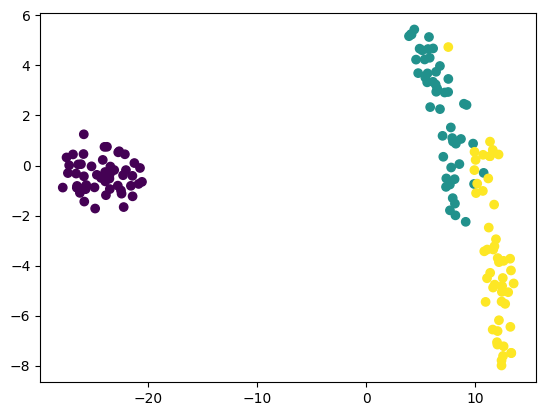

In [11]:
visualization(X)